In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读取数据集

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### EDA 探索分析

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe() # 数据描述

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# 统计每一列NaN的数量

train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [8]:
# 计算NaN的占比
train.isnull().sum().sort_values(ascending=False) / train.shape[0]

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [9]:
test.isnull().sum().sort_values(ascending=False) / test.shape[0] # 每一列中，NaN所占比例

PoolQC         0.997944
MiscFeature    0.965045
Alley          0.926662
Fence          0.801234
FireplaceQu    0.500343
                 ...   
Electrical     0.000000
CentralAir     0.000000
HeatingQC      0.000000
Foundation     0.000000
Id             0.000000
Length: 80, dtype: float64

In [10]:
# 将 PoolQC，MiscFeature，Alley，Fence 列删除
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

test.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [11]:
print(train.shape)

(1460, 77)


In [12]:
print(test.shape)

(1459, 76)


In [13]:
# 统计train,test所有列中的：数值类型的列 和 分类类型的列
number_columns = [ col for col in train.columns if train[col].dtype != 'object']

category_columns = [col for col in train.columns if train[col].dtype == 'object']

In [14]:
len(number_columns)

38

In [15]:
len(category_columns)

39

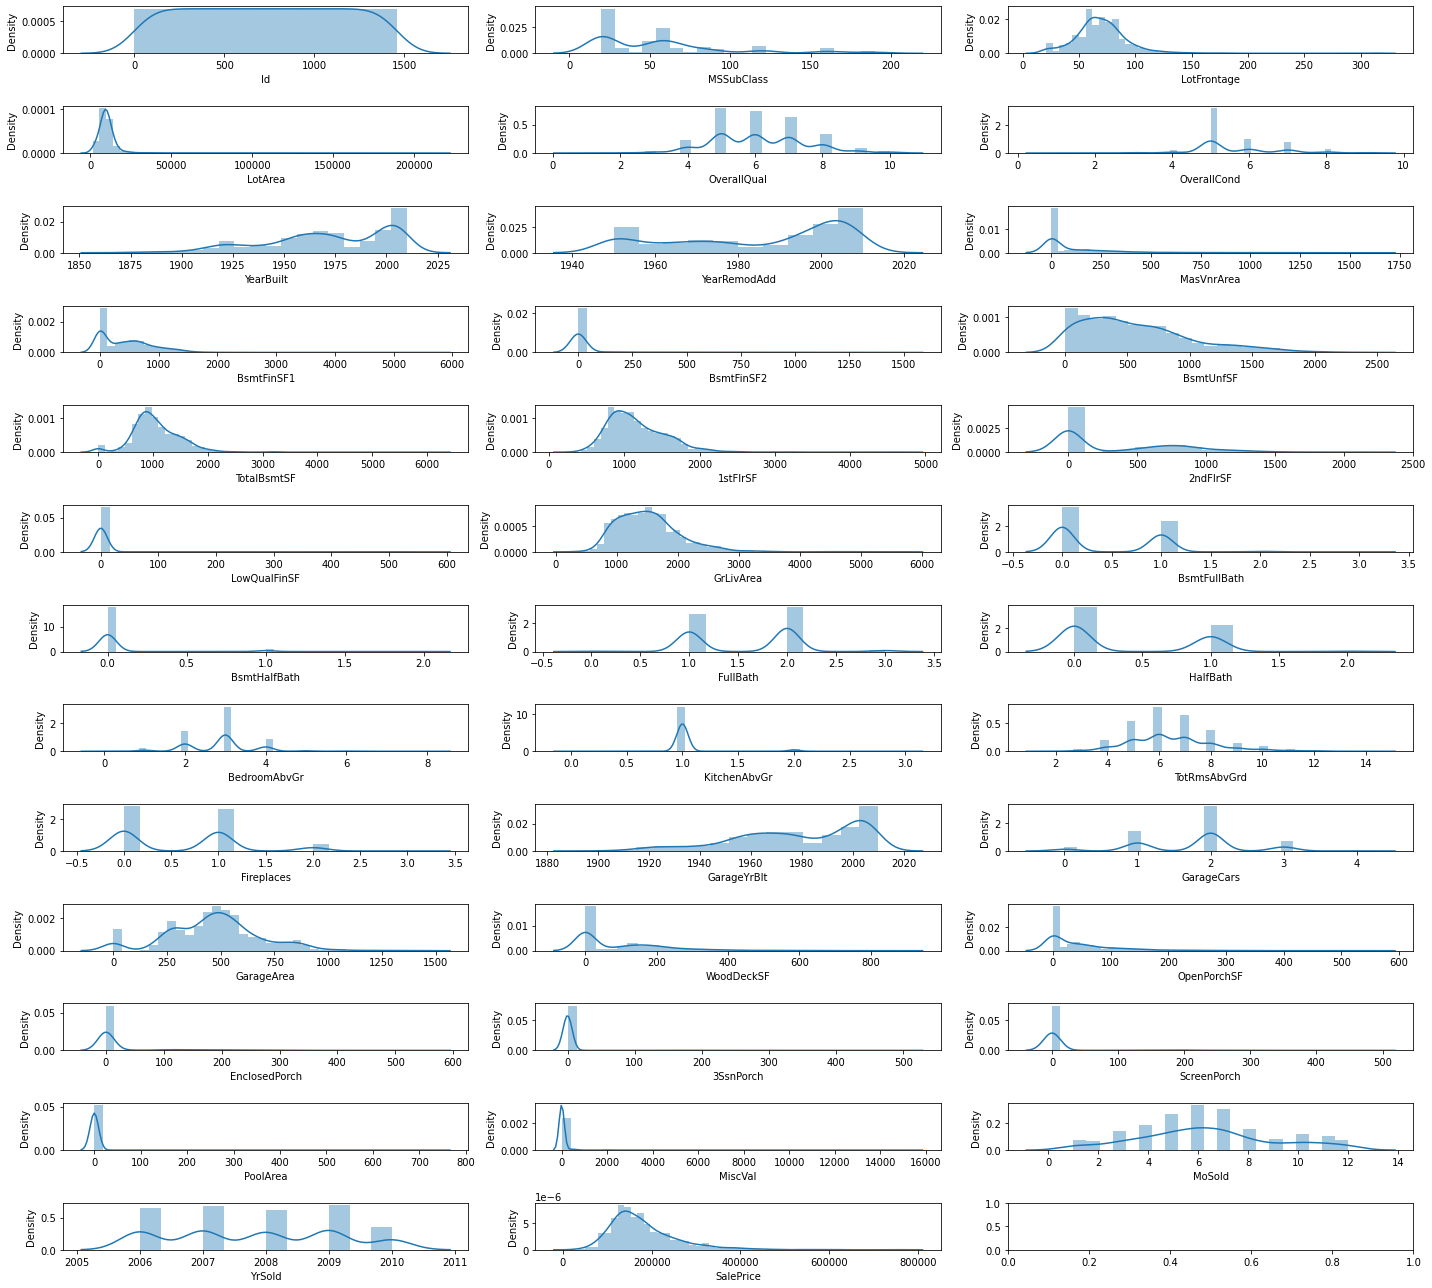

In [16]:
# 绘制显示数值类型列的数据分布
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in zip(range(len(number_columns)), number_columns):
    sns.distplot(train[col], ax=axes[i])
    plt.tight_layout()

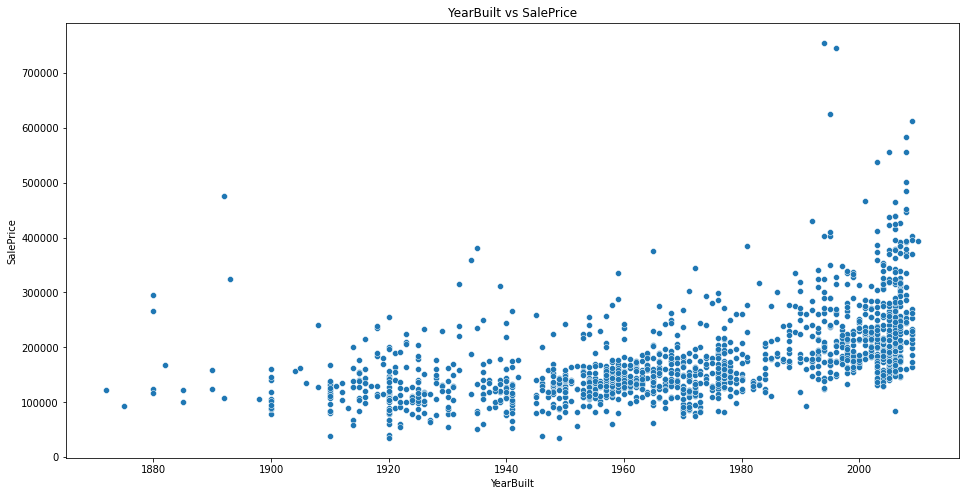

In [17]:
# 建造年份YearBuilt 与 售价SalePrice 的关系
plt.figure(figsize=(16, 8)) # 画布大小
plt.title("YearBuilt vs SalePrice")
#sns.scatterplot(x='YearBuilt', y='SalePrice', data=train) # 写法一
sns.scatterplot(train.YearBuilt, train.SalePrice) # 写法二
plt.show()

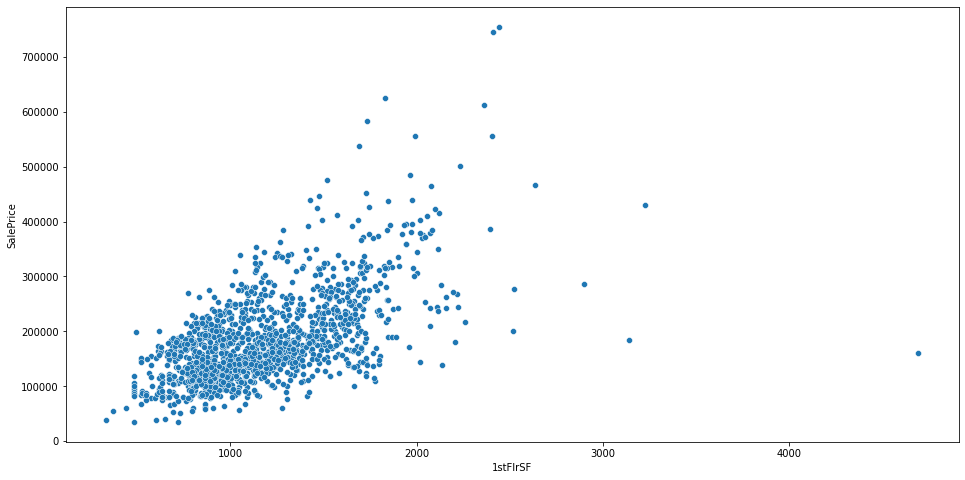

In [18]:
# 楼层面积1stFlrSF 与 售价SalePrice 的关系
plt.figure(figsize=(16, 8))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)
plt.show()

In [19]:
# 显示 分类类型 数据
len(category_columns)

39

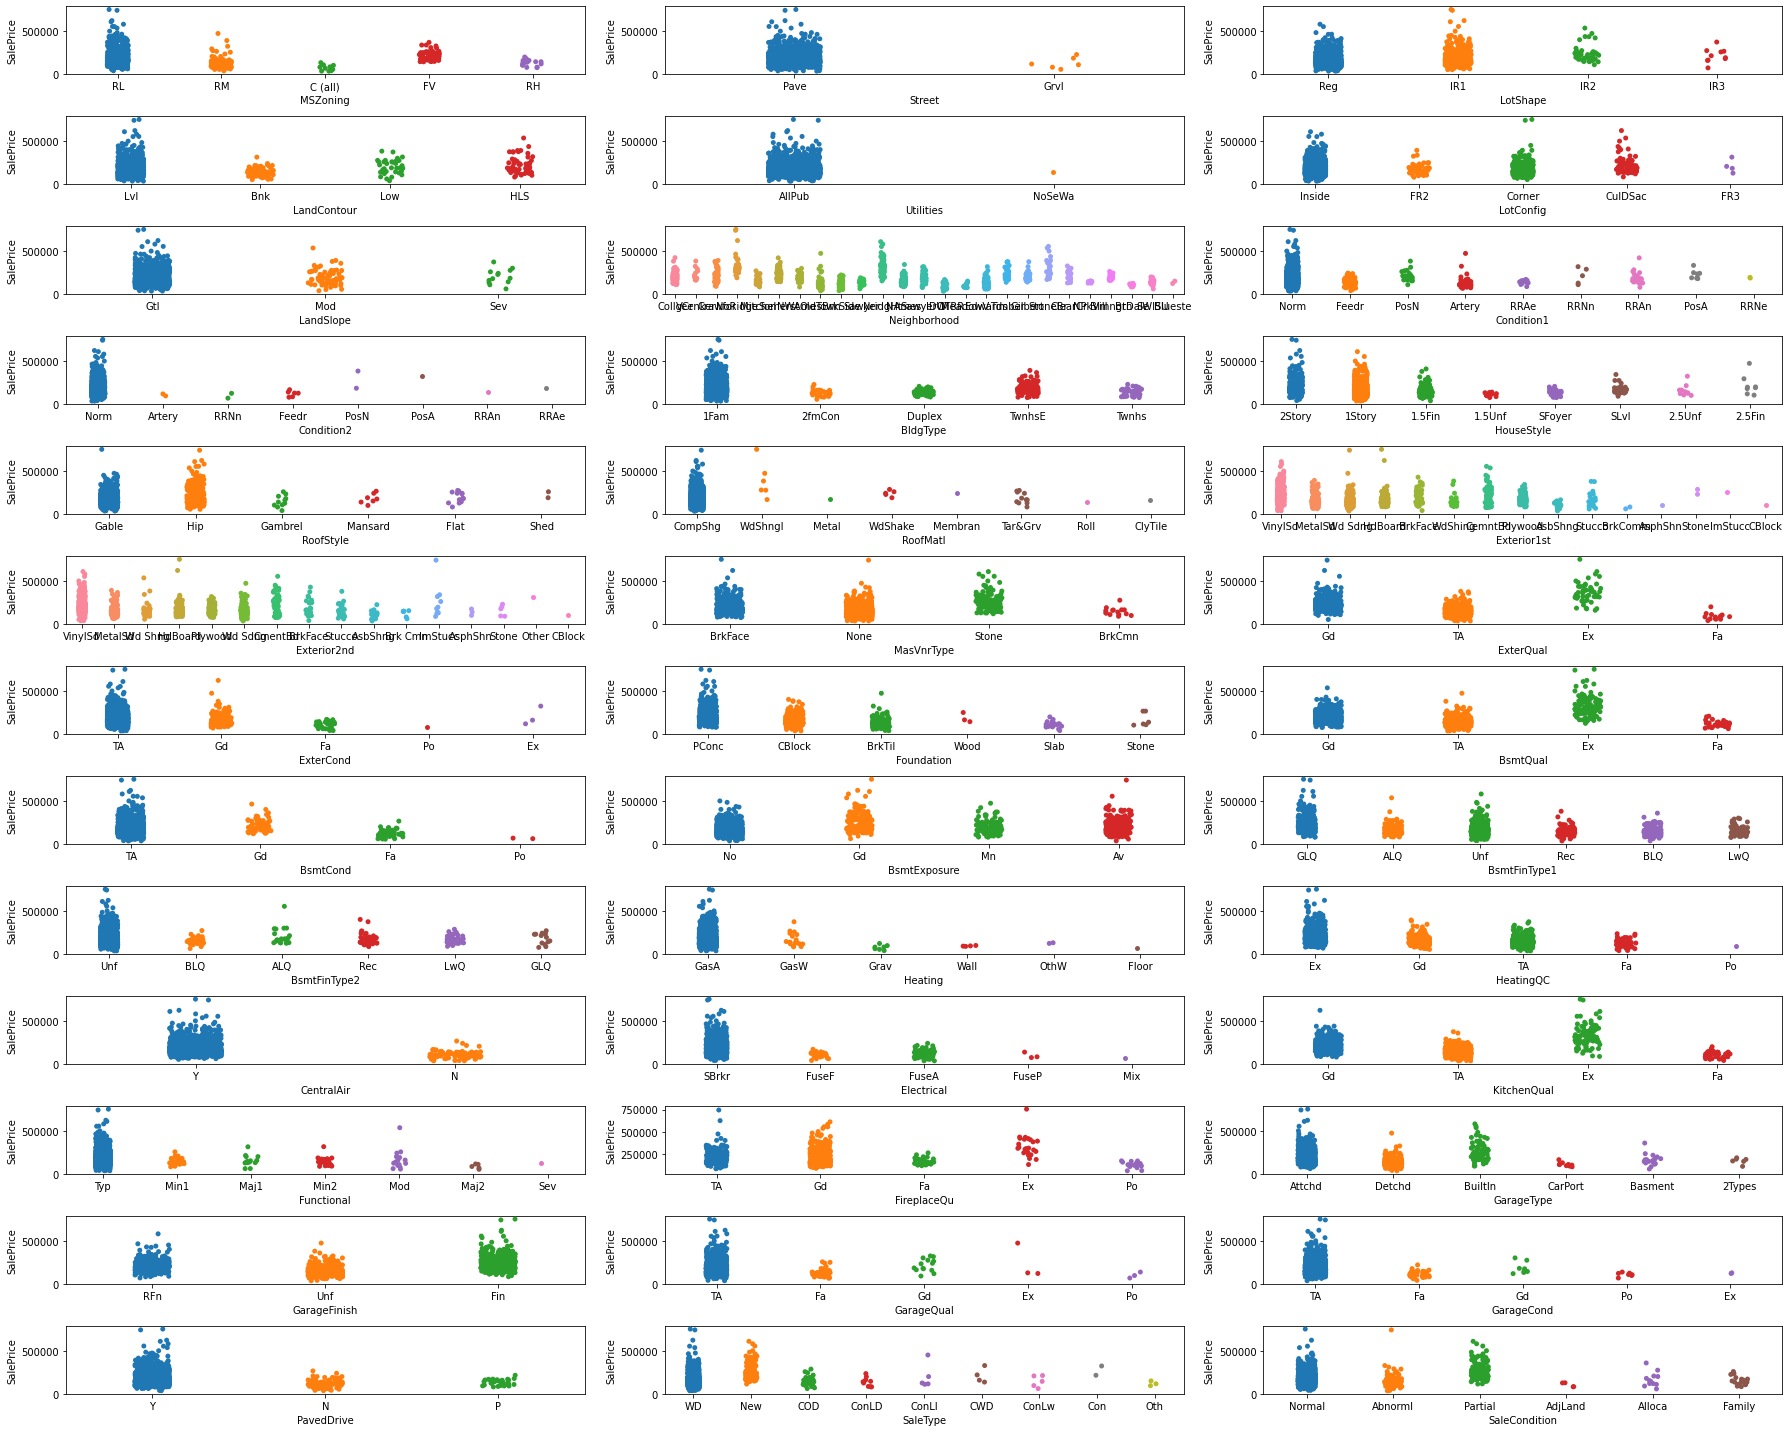

In [20]:
fig, axes = plt.subplots(13, 3, figsize=(25, 20))
axes = axes.flatten()
for i, col in enumerate(category_columns):
    sns.stripplot(x=col, y='SalePrice', data=train, ax=axes[i])
plt.tight_layout()
plt.show()

### Feature Engineering 特征工程

In [21]:
# 统计 train中有哪些列包含NaN
train_nan_num = [] # train中数值类型的列
train_nan_cat = [] # train中分类类型的列

for col in number_columns:
    if train[col].isnull().sum() > 0:
        train_nan_num.append(col)

for col in category_columns:
    if train[col].isnull().sum() > 0:
        train_nan_cat.append(col)

In [22]:
len(train_nan_num)

3

In [23]:
len(train_nan_cat)

12

In [24]:
# 统计 test中有哪些列包含NaN
test_nan_num = [] # test中数值类型的列
test_nan_cat = [] # test中分类类型的列

# 注意：需要将SalePrice清理，因为test中没有SalePrice
number_columns.remove('SalePrice')

for col in number_columns:
    if test[col].isnull().sum() > 0:
        test_nan_num.append(col)

for col in category_columns:
    if test[col].isnull().sum() > 0:
        test_nan_cat.append(col)

In [25]:
len(test_nan_num)

11

In [26]:
len(test_nan_cat)

18

## 针对 空缺值 的处理方式

### 1 简单粗暴：直接删除

In [27]:
train_one = train.dropna(axis=0)
test_one = test.dropna(axis=0)
print(train_one.shape)
print(test_one.shape)

(583, 77)
(562, 76)


### 2 折中法：对于数值类型列，取中位数；对于分类类型列，取None；

In [28]:
# train
for col in train_nan_num:
    train[col].fillna(train[col].median(), inplace=True) # 中位数替代
    
for col in train_nan_cat:
    train[col].fillna('None', inplace=True)

In [29]:
train.shape

(1460, 77)

In [30]:
# test
for col in test_nan_num:
    test[col].fillna(test[col].median(), inplace=True) # 中位数

for col in test_nan_cat:
    test[col].fillna('None', inplace=True)

In [31]:
test.shape

(1459, 76)

# 算法建模、训练、验证

### 1 数据集分类

In [32]:
# 对 分类类型 列进行LabelEncoding
# 举例：A, B, C, D, E  --LabelEncoding--> 0, 1, 2, 3, 4
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in category_columns:
    train[col] = LE.fit_transform(train[col])
    test[col] = LE.fit_transform(test[col])

In [33]:
# 构建训练集和验证集
X = train.drop(columns=['Id', 'SalePrice'], axis=1).values # 说明：Id不是特征，SalePrice是标签，需要屏蔽
y = train['SalePrice'].values # 标签 SalePrice

In [34]:
# 数据集分离
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True) # 验证集占比30%，打乱顺序

In [35]:
X_train.shape

(1022, 75)

In [36]:
X_test.shape

(438, 75)

### 2 创建回归模型

In [37]:
# 1 线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
'''
MSE: Mean Squared Error
均方误差是指参数估计值与参数真值之差平方的期望值;
MSE可以评价数据的变化程度，MSE的值越小，说明预测模型描述实验数据具有更好的精确度。

'''

LR = LinearRegression()
LR.fit(X_train, y_train) # 训练
y_pred = LR.predict(X_test) # 预测

print(f'Root Mean Squared Error : {np.sqrt(mean_absolute_error(np.log(y_test), np.log(y_pred)))}')

Root Mean Squared Error : 0.3379824506864778


In [38]:
# K折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) # 10折

rmse_scores = [] # 保存10折运行的结果


for train_indices, test_indices in kf.split(X): # 分割元数据，生成索引
    X_train, X_test = X[train_indices], X[test_indices] # 训练集和验证集
    y_train, y_test = y[train_indices], y[test_indices] # 训练标签集和验证标签集
    # 初始化线性回归模型对象
    LR = LinearRegression(normalize=True)
    LR.fit(X_train, y_train) # 训练
    y_pred = LR.predict(X_test) # 预测
    rmse = np.sqrt(mean_absolute_error(np.log(y_test), np.log(abs(y_pred)))) # 评估
    rmse_scores.append(rmse) # 累计每一轮的验证结果
   

print("rmse scores : ", rmse_scores)
print(f'average rmse score : {np.mean(rmse_scores)}')

rmse scores :  [0.3468636173064745, 0.3261248953047877, 0.34119466933672404, 0.34863936596263606, 0.33935010724183096, 0.3201273588551045, 0.5536010018895273, 0.3472749729695963, 0.3502178373120977, 0.3242470278359613]
average rmse score : 0.35976408540147403


In [39]:
# 2 随机森林（回归）
from sklearn.ensemble import RandomForestRegressor

# K折交叉验证
kf = KFold(n_splits=10)

rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    RFR = RandomForestRegressor() # 基模型
    # 训练/fit拟合
    RFR.fit(X_train, y_train)
    # 预测
    y_pred = RFR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

print("rmse scores : ", rmse_scores)
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [17078.963561643835, 17473.639999999996, 15918.478835616439, 18632.12821917809, 19598.979589041093, 15080.041232876716, 15503.786917808216, 16824.61308219178, 20451.017739726027, 17345.241506849314]
average rmse scores : 17390.68906849315


In [40]:
# 3 lightGBM（回归）
import lightgbm as lgb

# K折交叉验证
kf = KFold(n_splits=10)

rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    LGBR = lgb.LGBMRegressor() # 基模型
    # 训练/fit拟合
    LGBR.fit(X_train, y_train)
    # 预测
    y_pred = LGBR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

print("rmse scores : ", rmse_scores)
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [15359.402748938854, 15741.737528953727, 15969.526562520143, 18894.146656718858, 18024.993613003247, 13965.125436661849, 15143.365694484835, 15078.135246736836, 19796.617026917127, 15653.692389674065]
average rmse scores : 16362.674290460956


In [41]:
# xgboost

import xgboost as xgb

# K折交叉验证
kf = KFold(n_splits=10)

rmse_scores = [] 

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # 初始化模型
    XGBR = xgb.XGBRegressor() # 基模型
    # 训练/fit拟合
    XGBR.fit(X_train, y_train)
    # 预测
    y_pred = XGBR.predict(X_test)
    # 评估
    rmse = mean_absolute_error(y_test, y_pred)
    # 累计结果
    rmse_scores.append(rmse)

print("rmse scores : ", rmse_scores)
print(f'average rmse scores : {np.mean(rmse_scores)}')

rmse scores :  [16110.042059075342, 16075.209225171233, 15938.499250856165, 20021.78087542808, 18082.502969820205, 16993.78622645548, 15104.168530607876, 14330.887360873288, 22004.944402825342, 16733.29898865582]
average rmse scores : 17139.511988976883


# 模型预测

In [42]:
test.shape

(1459, 76)

In [43]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,9,4


In [44]:
# 1 选取 lightGBM 算法

LGBR.fit(X, y) # 在整个数据集上训练

test_pred = LGBR.predict(test.drop('Id',axis=1).values)

In [45]:
result_df = pd.DataFrame(columns=['SalePrice'])

result_df['SalePrice'] = test_pred

result_df.to_csv('LGBR_base_model.csv', index=None, header=True)

In [46]:
result_df

,SalePrice
0,129796.526226
1,149352.852576
2,181589.899522
3,170741.853808
4,192893.792670
...,...
1454,82351.830843
1455,82605.857384
1456,156565.544353
1457,112220.993992


<AxesSubplot:>

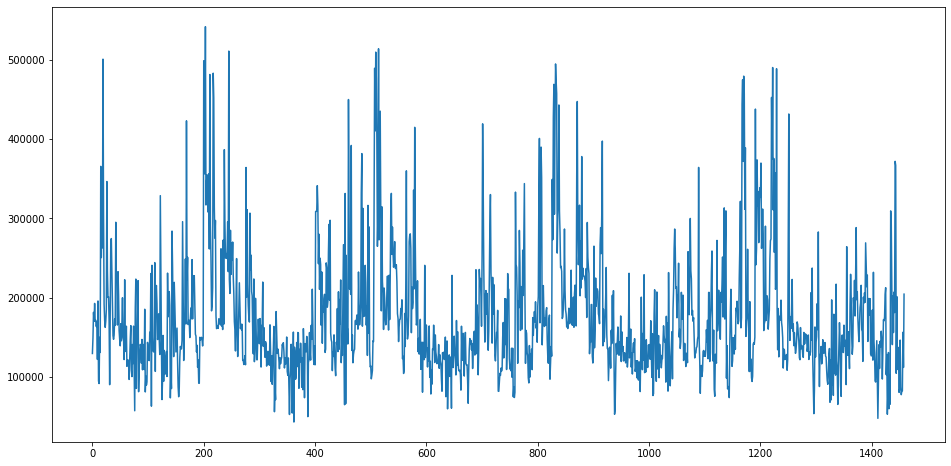

In [47]:
result_df['SalePrice'].plot(figsize=(16,8))

In [48]:
# 2 lightGBM算法调参

train_data = lgb.Dataset(X_train, label=y_train) # 训练集
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data) # 验证集

In [49]:
# 参数
params = {
    'objective':'regression', # 目标任务
    'metric':'rmse', # 评估指标
    'learning_rate':0.1, # 学习率
    'max_depth':15, # 树的深度
    'num_leaves':20, # 叶子数
}

# 创建模型对象
model = lgb.train(params=params,
                  train_set=train_data,
                  num_boost_round=300,
                  early_stopping_rounds=30,
                  valid_names=['test'],
                  valid_sets=[test_data])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3285
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 71
[LightGBM] [Info] Start training from score 181505.279300
[1]	test's rmse: 66924.6
Training until validation scores don't improve for 30 rounds
[2]	test's rmse: 61752.1
[3]	test's rmse: 57339.6
[4]	test's rmse: 52143
[5]	test's rmse: 48627.5
[6]	test's rmse: 45291.8
[7]	test's rmse: 42433.8
[8]	test's rmse: 40243.5
[9]	test's rmse: 38085.9
[10]	test's rmse: 36283.7
[11]	test's rmse: 34879.2
[12]	test's rmse: 33724.2
[13]	test's rmse: 32529.4
[14]	test's rmse: 31568.7
[15]	test's rmse: 30709.2
[16]	test's rmse: 29922.4
[17]	test's rmse: 29427.7
[18]	test's rmse: 28849.6
[19]	test's rmse: 28312.4
[20]	test's rmse: 27991.4
[21]	test's rmse: 27568.7
[22]	test's rmse: 27132.6
[23]	test's rmse: 26884.1
[24

In [50]:
score = model.best_score['test']['rmse']

score

25323.26266593107

In [51]:
test_pred = model.predict(test.drop('Id',axis=1).values)

In [52]:
result_df2 = pd.DataFrame(columns=['SalePrice'])

result_df2['SalePrice'] = test_pred

result_df2.to_csv('LGBR_model2.csv', index=None, header=True)

<AxesSubplot:>

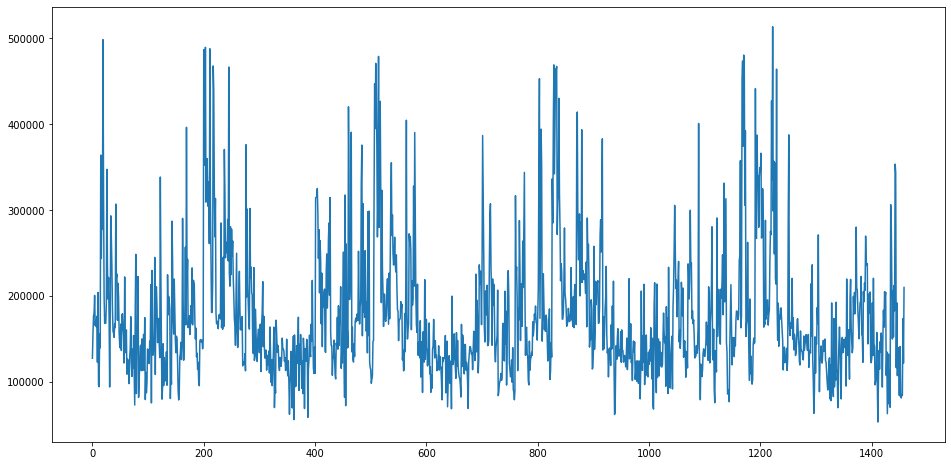

In [53]:
result_df2['SalePrice'].plot(figsize=(16,8))